#### This is an analysis for the prediction of heart attack from a hospital dataset

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#reading dataset using pandas
data= pd.read_csv("C:/Users/HP/Downloads/heart.csv")

In [4]:
#checking the data
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#removing duplicates from the data
data.drop_duplicates(keep='first',inplace=True)

In [6]:
#checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


From the information of the data we can see that all values are in integers, only the column old peak was an exception amongst them


In [8]:
#checking for null values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
#checking for the statistical measures
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


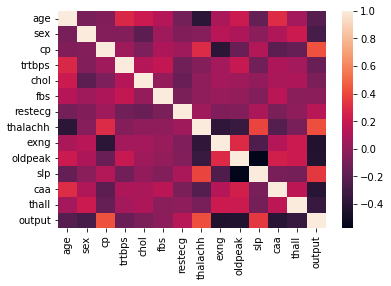

In [10]:
#checking for correlation
corr= data.corr()
corr
#visualizing the correlation
sns.heatmap(corr);

#### Exploratory analysis and Visualizations

In [12]:
#exploring characteristics of sex
sex_group= data["sex"].unique()
sex_group

array([1, 0], dtype=int64)

In [13]:
#replacing values in a column
sex_dict= {1: "Female", 0: "Male"}
sex_groups= data["sex"].replace(sex_dict)

In [14]:
#find the value counts
sex_groups_value_counts= sex_groups.value_counts()

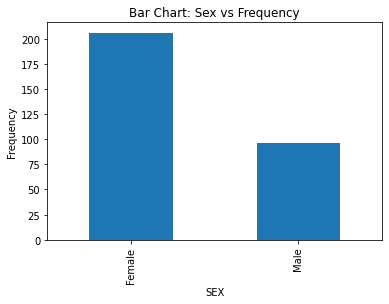

In [15]:
#creatong a bar plot too display the tendency of heart attack among sex groups
sex_groups_value_counts.plot(kind= "bar"),
plt.xlabel("SEX"),
plt.ylabel("Frequency"),
plt.title("Bar Chart: Sex vs Frequency");

This bar chart above shows the females are prone to heart attack than the males

Lets visualize the other columns

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


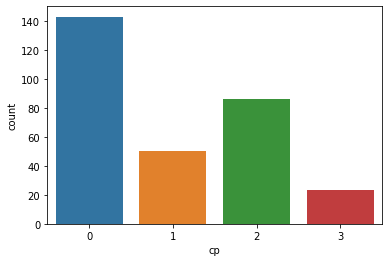

In [16]:
#checking the value counts of chest pain
x=(data.cp.value_counts())
print(x)
#visualizing the chest pain using seaborn
p = sns.countplot(data=data, x="cp")
plt.show()

In [17]:
#exploring fbs amongst the sex groups
fbs_group= data["fbs"].unique()
fbs_group

array([1, 0], dtype=int64)

In [18]:
#replacing values in a column
fbs_dict= {1: "Female", 0: "Male"}
fbs_groups= data["fbs"].replace(fbs_dict)

In [19]:
#find the value counts
fbs_groups_value_counts= fbs_groups.value_counts()

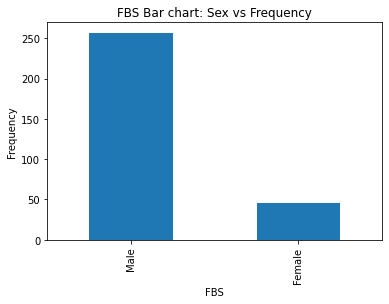

In [20]:
#creatong a bar plot too display "fbs" among sex groups
fbs_groups_value_counts.plot(kind= "bar"),
plt.xlabel("FBS"),
plt.ylabel("Frequency"),
plt.title("FBS Bar chart: Sex vs Frequency");

1    151
0    147
2      4
Name: restecg, dtype: int64


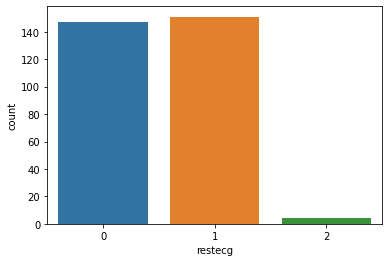

In [21]:
#Breakdown of ECG
#checking the value counts
x=(data.restecg.value_counts())
print(x)
#visualizing the value counts
p = sns.countplot(data=data, x="restecg")
plt.show()

exploring exercise induced angina

In [23]:
#exploring exercise induced angina amongst the sex groups
exng_group= data["exng"].unique()
exng_group

array([0, 1], dtype=int64)

In [24]:
#replacing values in a column
exng_dict= {1: "Female", 0: "Male"}
exng_groups= data["exng"].replace(exng_dict)

In [25]:
#find the value counts
exng_groups_value_counts= exng_groups.value_counts()

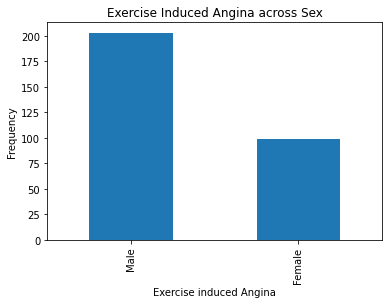

In [26]:
#creatong a bar plot to display exercise induced angina among sex groups
exng_groups_value_counts.plot(kind= "bar"),
plt.xlabel("Exercise induced Angina"),
plt.ylabel("Frequency"),
plt.title("Exercise Induced Angina across Sex");

The chart above shows men are more likely to have a Exercise Induced Angina

Exploring Thalium stress test

2    165
3    117
1     18
0      2
Name: thall, dtype: int64


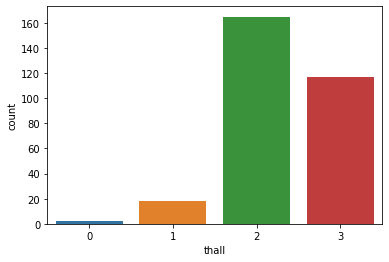

In [28]:
#creating value counts of thalium stress test
x=(data.thall.value_counts())
print(x)
#visualizing the results of the test with seaborn
p = sns.countplot(data=data, x="thall")
plt.show()

<Figure size 720x720 with 0 Axes>

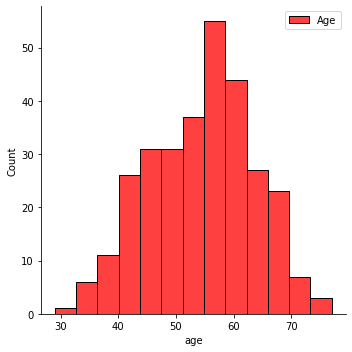

In [29]:
#visualizing Density distribution across age range
plt.figure(figsize=(10,10))
sns.displot(data.age, color="red", label="Age")
plt.legend();

In [30]:
#Splitting the data into train and test set
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values


In [31]:
#splitting and setting random state to enable reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (241, 12) (241,)
Shape for testing data (61, 12) (61,)


In [32]:
#instantiating standard scaler
scaler = StandardScaler()

In [33]:
#fitting and transforming the training features
x_train = scaler.fit_transform(x_train)

In [34]:
#fitting and transfroming the test set
x_test = scaler.transform(x_test)

First we use Logistic Regression to build a predicting model

In [36]:
#first we instantiate logistic regression
model_lr = LogisticRegression()

In [37]:
#fitting the model to the training set
model_lr.fit(x_train, y_train)

LogisticRegression()

Evaluating the model built

In [39]:
#calculating the accuracy score for logistic regression
acc_train= accuracy_score(y_train, model_lr.predict(x_train))
print("Training Accuracy:", round(acc_train,2)*100, "%")

Training Accuracy: 86.0 %


Predictions

In [41]:
predicted= model_lr.predict(x_test)

In [42]:
#creating a confusion matix
cf_matrix=confusion_matrix(y_test, predicted)
cf_matrix

array([[25,  4],
       [ 6, 26]], dtype=int64)

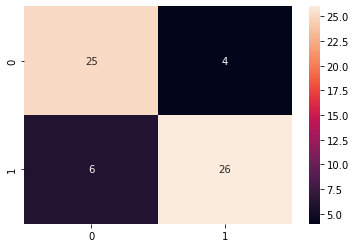

In [43]:
#visualizing confusion matrix
sns.heatmap(cf_matrix, annot=True);

Let us try Support Vector Machine

In [45]:
#first instantiate the model
model = SVC()

In [46]:
#fitting the model into the training set
model.fit(x_train, y_train)

SVC()

In [47]:
#making predictions
pred = model.predict(x_test)

In [48]:
#calculating the accuracy score for Support vector machine
acc_training= accuracy_score(y_train, model.predict(x_train))
print("Training Accuracy:", round(acc_train,2)*100, "%")

Training Accuracy: 86.0 %


In [49]:
#creating a confusion matix
cf_matrix=confusion_matrix(y_test, pred)
cf_matrix

array([[27,  2],
       [ 5, 27]], dtype=int64)

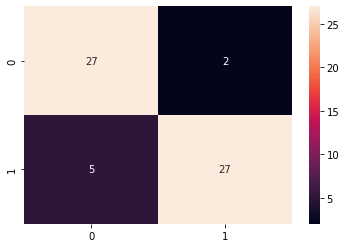

In [50]:
#visualizing confusion matrix
sns.heatmap(cf_matrix, annot=True);